In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(url, delim_whitespace=True, names=columns)

/tmp/ipython-input-3569285301.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(url, delim_whitespace=True, names=columns)


In [6]:
print("First 5 rows:")
print(df.head())

First 5 rows:
    mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car_name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [7]:
print("\nBasic Info:")
print(df.info())


Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None


In [8]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model_year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


In [10]:
print("\nChecking for '?' in horsepower:")
print(df['horsepower'].value_counts().head())


Checking for '?' in horsepower:
horsepower
150.0    22
90.0     20
88.0     19
110.0    18
100.0    17
Name: count, dtype: int64


In [11]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [12]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')

In [13]:
print("\nRows with missing horsepower before filling:")
print(df[df['horsepower'].isna()].head())


Rows with missing horsepower before filling:
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
32   25.0          4          98.0         NaN  2046.0          19.0   
126  21.0          6         200.0         NaN  2875.0          17.0   
330  40.9          4          85.0         NaN  1835.0          17.3   
336  23.6          4         140.0         NaN  2905.0          14.3   
354  34.5          4         100.0         NaN  2320.0          15.8   

     model_year  origin              car_name  
32           71       1            ford pinto  
126          74       1         ford maverick  
330          80       2  renault lecar deluxe  
336          80       1    ford mustang cobra  
354          81       2           renault 18i  


In [14]:
print("\nBasic Info after cleaning horsepower:")
print(df.info())


Basic Info after cleaning horsepower:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB
None


In [16]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [17]:
print("\nRows with missing horsepower after filling:")
print(df[df['horsepower'].isna()].head())


Rows with missing horsepower after filling:
Empty DataFrame
Columns: [mpg, cylinders, displacement, horsepower, weight, acceleration, model_year, origin, car_name]
Index: []


In [18]:
origin_map = {1: 'USA', 2: 'Asia', 3: 'Europe'}
df['origin'] = df['origin'].map(origin_map)

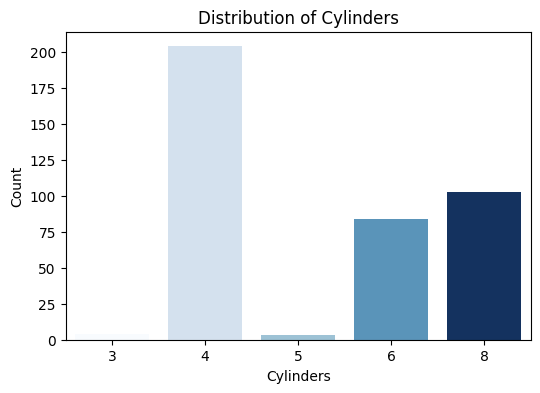

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(x='cylinders', data=df, hue='cylinders', palette='Blues', legend=False)
plt.title('Distribution of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

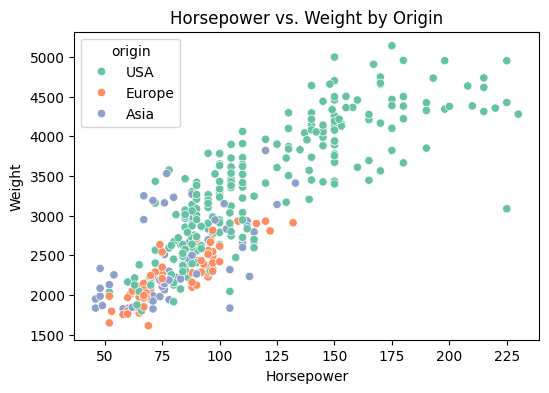

In [21]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='horsepower', y='weight', data=df, hue='origin', palette='Set2')
plt.title('Horsepower vs. Weight by Origin')
plt.xlabel('Horsepower')
plt.ylabel('Weight')
plt.show()

Question: How does MPG change across different places?

/tmp/ipython-input-3706894197.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='origin', y='mpg', data=df, palette='pastel')


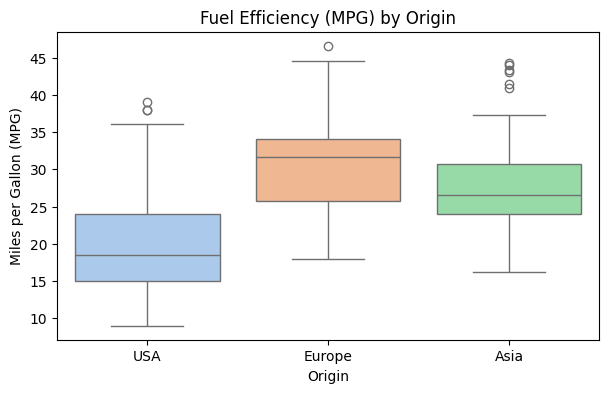

In [22]:
plt.figure(figsize=(7,4))
sns.boxplot(x='origin', y='mpg', data=df, palette='pastel')
plt.title('Fuel Efficiency (MPG) by Origin')
plt.xlabel('Origin')
plt.ylabel('Miles per Gallon (MPG)')
plt.show()

OVERALL:

1. Most cars in the dataset have 4 cylinders.
2. Heavier cars tend to have higher horsepower.
3. Cars from Asia generally have higher MPG compared to those from the USA and Europe.